# PA 1, Evaulation Tools

1. Import libraries

In [36]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

2. Load data and test print sample \#0

In [37]:
data = datasets.load_digits()

0


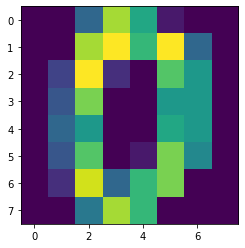

In [38]:
test = data.data[0].reshape(8,8)
print(data.target[0])
plt.imshow(test)

3. Split data into X_train, X_test, y_train and y_test

In [39]:
n = len(data.data)
print(n)

1797


In [40]:
X = np.asarray([data.data[i] for i in range(n)])
y = np.asarray([data.target[i] for i in range(n)])
print(X.shape, y.shape)

(1797, 64) (1797,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

4. Process the data with a k-NN classifier

In [42]:
kNN = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')

In [43]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [44]:
y_pred = kNN.predict(X_test)

In [45]:
distances, neighbors = kNN.kneighbors(X_test)
print(distances.shape, neighbors.shape)

(540, 5) (540, 5)


5. Evaluate K-NN classifier

In [46]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.92      1.00      0.96        55
           2       1.00      0.98      0.99        58
           3       0.98      0.97      0.97        58
           4       1.00      0.98      0.99        48
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        63
           7       0.95      1.00      0.98        41
           8       0.94      0.91      0.92        54
           9       0.98      0.96      0.97        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [47]:
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[64  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 57  1  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  2  0  0]
 [ 0  0  0  0 47  0  0  0  1  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 62  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  5  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  1  0  0  1 49]]


Cluster the data with k-Means

In [51]:
kmeans = KMeans(n_clusters=10)

In [52]:
kmeans.fit(X_train)

KMeans(n_clusters=10)

In [53]:
clusters = kmeans.cluster_centers_

Visualize cluster centers

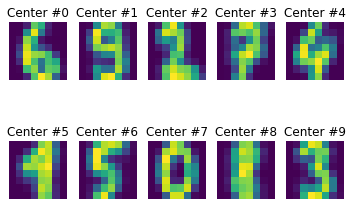

In [54]:
for i, c in enumerate(clusters):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(c.reshape(8,8))
    plt.title('Center #'+str(i))

In [55]:
y_pred = kmeans.predict(X_test)

In [56]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.00      0.00      0.00        55
           2       0.85      0.79      0.82        58
           3       0.08      0.07      0.07        58
           4       0.98      0.85      0.91        48
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        41
           8       0.46      0.59      0.52        54
           9       0.05      0.06      0.06        51

    accuracy                           0.23       540
   macro avg       0.24      0.24      0.24       540
weighted avg       0.24      0.23      0.23       540



In [57]:
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[ 0  0  0  0  1  0  0 63  0  0]
 [ 0  0  7  0  0 18  1  0 29  0]
 [ 0  0 46  2  0  0  0  1  4  5]
 [ 0  4  0  4  0  0  0  0  2 48]
 [ 0  0  0  5 41  2  0  0  0  0]
 [ 0 13  0  0  0  0 35  0  0  0]
 [61  0  0  0  0  1  0  0  1  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0 14  1  1  0  3  2  0 32  1]
 [ 0 41  0  0  0  4  2  0  1  3]]


In [79]:
y_pred = kmeans.predict(X_train)

print(sklearn.metrics.completeness_score(y_train, y_pred))
print(sklearn.metrics.homogeneity_score(y_train, y_pred))
print(sklearn.metrics.adjusted_mutual_info_score(y_train, y_pred))

0.7452805370468285
0.7370592134372654
0.737378995169464


## Check List

Plot 5 nearest neighbors

In [75]:
y_pred = kNN.predict(X_test)

Text(0.5, 1.0, 'Label: 8, predicted as: 1')

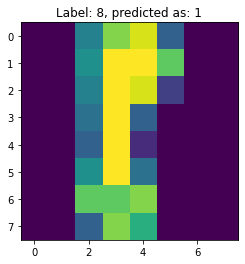

In [76]:
plt.imshow(X_test[0].reshape(8,8))
plt.title('Label: %i, predicted as: %i' % (y_test[0], y_pred[0]))

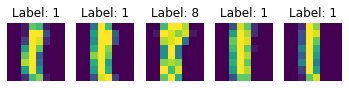

In [77]:
for i, n in enumerate(neighbors[0]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(X_train[n].reshape(8,8))
    plt.title('Label: %i' % y_train[n])

The classification report for k-NN shows a very high for all quantities:

precision = $\frac{|TP|}{|TP|+|FP|}$

recall = $\frac{|TP|}{|TP|+|FN|}$

f1 = $\frac{\text{precision + recall}}{2}$

Which shows in a strongly diagonally dominant confusion matrix. But we still have some mis-labels (example 8s predicted as 1s).

The same cannot be said for the evaluation report and confusion matrix of k-Means, which shows very low scores overall. This could be explained by its unsupervised implementation, as this algorithm may find patterns in data not desirable for our specific classification.

An intuitive explanation for K-means better _completeness score_ is that the algorithm correctly clusters data with same labels into the same cluster, but fails to classify that cluster. This also shows in the relatively high _homogeneity score_, i.e. the clusters mainly contains data points which are members of a single class. The high _mutual info score_ is a measure of the similarity between test labels and predicted labels.